In [1]:
#Connecting to Gdrive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Auth & PyDrive client creation
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
#Accessing file inside drive, once auth is done, by id
id = '1bImyLw86vebULvrHdO6bVbi6PF4uqr9z' 
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('nips_papers.zip')

In [3]:
#Unzipping 'nips_papers'
!unzip /content/nips_papers.zip

Archive:  /content/nips_papers.zip
replace NIPS Papers/authors.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: NIPS Papers/authors.csv  
replace __MACOSX/NIPS Papers/._authors.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/NIPS Papers/._authors.csv  
replace NIPS Papers/paper_authors.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: NIPS Papers/paper_authors.csv  
replace __MACOSX/NIPS Papers/._paper_authors.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/NIPS Papers/._paper_authors.csv  
replace NIPS Papers/papers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: NIPS Papers/papers.csv  y

replace __MACOSX/NIPS Papers/._papers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: __MACOSX/NIPS Papers/._papers.csv  


In [4]:
#Loading packages to start analysis
import pandas as pd
import os


In [5]:
# Read data into papers
papers = pd.read_csv('/content/NIPS Papers/papers.csv')

In [6]:
# Print head
papers.shape
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [7]:
papers.columns

Index(['id', 'year', 'title', 'event_type', 'pdf_name', 'abstract',
       'paper_text'],
      dtype='object')

In [8]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
4742,2014,A Safe Screening Rule for Sparse Logistic Regr...,The l1-regularized logistic regression (or spa...,A Safe Screening Rule for Sparse Logistic Regr...
5520,2015,Fast Distributed k-Center Clustering with Outl...,Clustering large data is a fundamental problem...,Fast Distributed k-Center Clustering with Outl...
4378,2013,On Sampling from the Gibbs Distribution with R...,In this paper we describe how MAP inference ca...,On Sampling from the Gibbs Distribution with\n...
3669,2011,Active learning of neural response functions w...,A sizable literature has focused on the proble...,Active learning of neural response functions\n...
413,1997,Bidirectional Retrieval from Associative Memory,Abstract Missing,Bidirectional Retrieval from Associative\nMemo...


In [9]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

4742    a safe screening rule for sparse logistic regr...
5520    fast distributed k-center clustering with outl...
4378    on sampling from the gibbs distribution with\n...
3669    active learning of neural response functions\n...
413     bidirectional retrieval from associative\nmemo...
Name: paper_text_processed, dtype: object

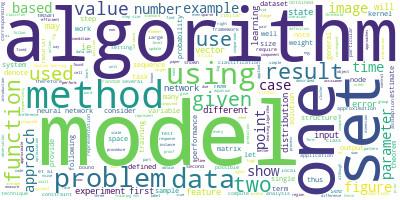

In [10]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [11]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['safe', 'screening', 'rule', 'sparse', 'logistic', 'regression', 'jiayu', 'zhou', 'arizona', 'state', 'university', 'tempe', 'az', 'jiayuzhou', 'asuedu', 'jie', 'wang', 'arizona', 'state', 'university', 'tempe', 'az', 'jiewangustc', 'asuedu', 'jun', 'liu', 'sas', 'institute', 'inc', 'cary']


In [12]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 3), (13, 2), (14, 1), (15, 3), (16, 1), (17, 2), (18, 4), (19, 5), (20, 3), (21, 3), (22, 3), (23, 2), (24, 5), (25, 1), (26, 3), (27, 1), (28, 1), (29, 1)]


In [13]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"data" + 0.005*"model" + 0.005*"set" + 0.004*"algorithm" + '
  '0.004*"function" + 0.004*"learning" + 0.003*"training" + 0.003*"figure" + '
  '0.003*"neural" + 0.003*"models"'),
 (1,
  '0.007*"data" + 0.005*"learning" + 0.005*"algorithm" + 0.004*"set" + '
  '0.004*"using" + 0.004*"model" + 0.004*"matrix" + 0.003*"one" + '
  '0.003*"based" + 0.003*"time"'),
 (2,
  '0.007*"model" + 0.006*"data" + 0.005*"set" + 0.005*"time" + 0.004*"two" + '
  '0.004*"algorithm" + 0.004*"one" + 0.004*"learning" + 0.004*"using" + '
  '0.004*"problem"'),
 (3,
  '0.006*"algorithm" + 0.004*"model" + 0.004*"set" + 0.004*"one" + '
  '0.004*"time" + 0.004*"using" + 0.003*"results" + 0.003*"function" + '
  '0.003*"given" + 0.003*"data"'),
 (4,
  '0.007*"learning" + 0.006*"model" + 0.005*"data" + 0.005*"function" + '
  '0.004*"algorithm" + 0.004*"figure" + 0.004*"set" + 0.003*"training" + '
  '0.003*"using" + 0.003*"problem"'),
 (5,
  '0.008*"learning" + 0.006*"data" + 0.005*"model" + 0.004*"algorith

In [17]:
!pip install pyLDAvis.gensim

ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim


In [21]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.002924  0.012080       1        1  23.705603
2     -0.013327  0.000748       2        1  13.914262
4     -0.002062  0.002595       3        1  13.346585
0      0.002766 -0.005038       4        1  10.991060
7      0.001332 -0.000405       5        1   8.475061
8     -0.001639 -0.001483       6        1   7.512399
5      0.008803 -0.000012       7        1   7.370143
3      0.002999  0.000006       8        1   6.471684
1      0.000850 -0.008678       9        1   4.232980
9     -0.002647  0.000188      10        1   3.980223, topic_info=          Term         Freq        Total Category  logprob  loglift
394   learning  1178.000000  1178.000000  Default  30.0000  30.0000
452      model  1359.000000  1359.000000  Default  29.0000  29.0000
151       data  1167.000000  1167.000000  Default  28.0000  28.0000
19   algorithm   974.000000   974.000000  Default  27.0000  27.0000
56       based   597.000000   597.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
751   training    21.251607   651.184152  Topic10  -6.0505  -0.1985
761        two    22.324798   792.908310  Topic10  -6.0013  -0.3462
777       used    19.385237   551.300706  Topic10  -6.1425  -0.1239
455     models    19.250489   571.896470  Topic10  -6.1494  -0.1676
276      given    18.625028   604.121718  Topic10  -6.1825  -0.2554

[875 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
14359      1  0.077147  aberrations
14359      2  0.231442  aberrations
14359      3  0.077147  aberrations
14359      4  0.077147  aberrations
14359      5  0.231442  aberrations
...      ...       ...          ...
816       10  0.059672         zero
12415      1  0.244557       zipser
12415      3  0.244557       zipser
12415      5  0.244557       zipser
12415     10  0.244557       zipser

[4043 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 5, 1, 8, 9, 6, 4, 2, 10])